In [ ]:
import matplotlib.pyplot as plt
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data, decode_captions
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [ ]:
# load sparse features
data = load_coco_data(data_path='./data', split='train', feature='conv5_3')
word_to_idx = data['word_to_idx']

In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=2048, n_time_step=16, cell_type='lstm', prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, use_dropout=True)

In [4]:
solver = CaptioningSolver(model, data, n_epochs=40, batch_size=128, update_rule='adam',
                                      learning_rate=0.001, print_every=3000, save_every=2, image_path='./image/train2014_resized',
                                pretrained_model=None, model_path='./model/lstm_conv5_3', test_model='./model/lstm_conv5_3/model-16', test_batch_size=100,
                                 candidate_caption_path='./data/', test_image_path='./image/val2014_resized')

In [ ]:
solver.train()

In [ ]:
# sampled captions and visualize attention weigths for train dataset
solver.test(data)

In [5]:
# load validation dataset
val_data = load_coco_data(data_path='./data', split='val', feature='conv5_3')

image_idxs <type 'numpy.ndarray'> (24221,) int32
captions <type 'numpy.ndarray'> (24221, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) |S29
elapse time: 1.41


Sampled Caption: a group of people standing outside of a building .


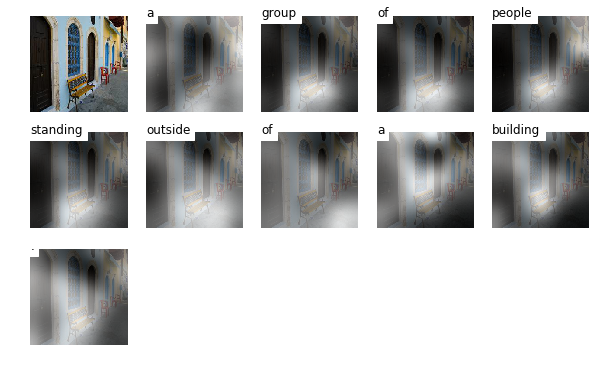

Sampled Caption: a woman is feeding a small sheep with a bottle .


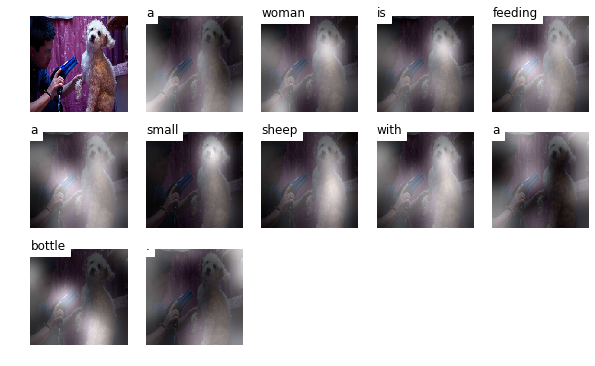

Sampled Caption: a red fire hydrant sitting on the side of a street .


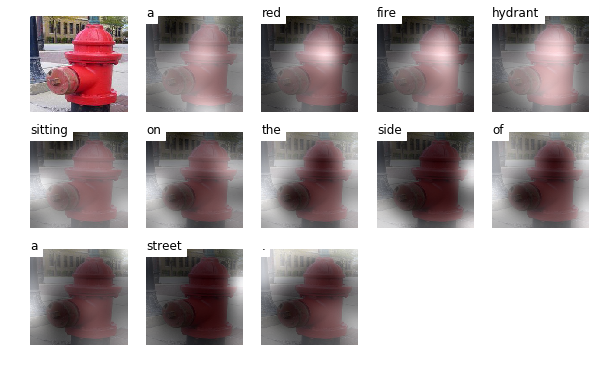

Sampled Caption: a person riding a motorcycle on a city street .


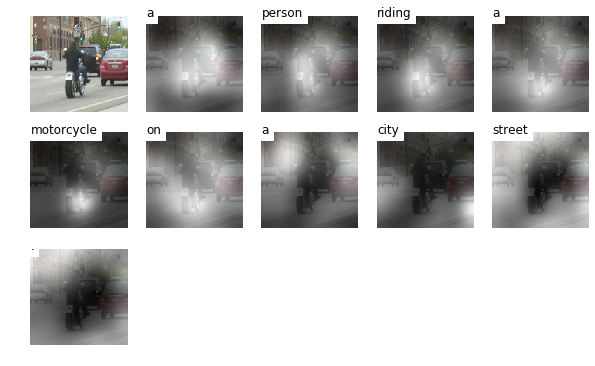

Sampled Caption: a train traveling down tracks next to a fence .


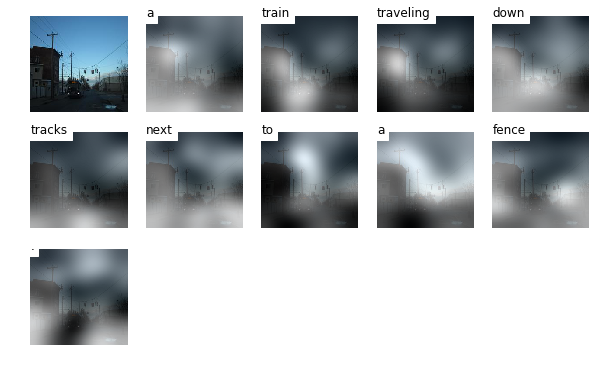

Sampled Caption: a man riding a wave on top of a surfboard .


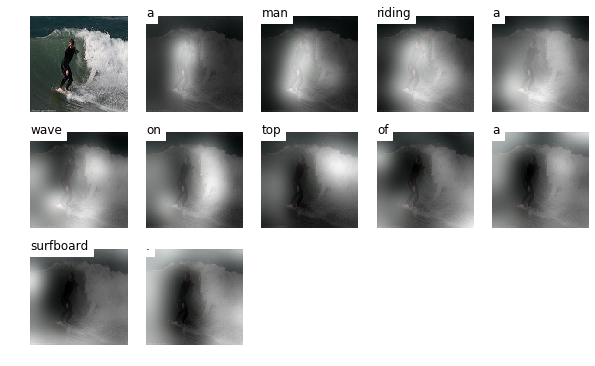

Sampled Caption: a train traveling down tracks next to a forest .


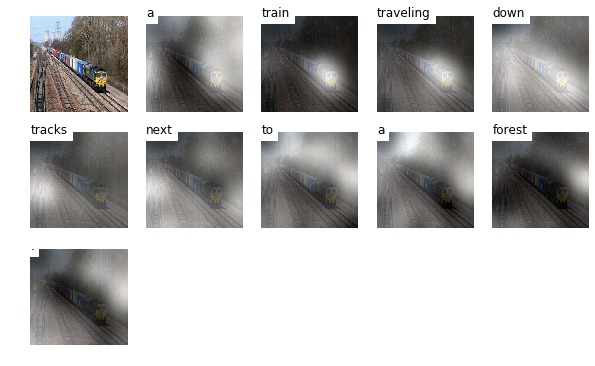

Sampled Caption: a large group of people sitting around a table .


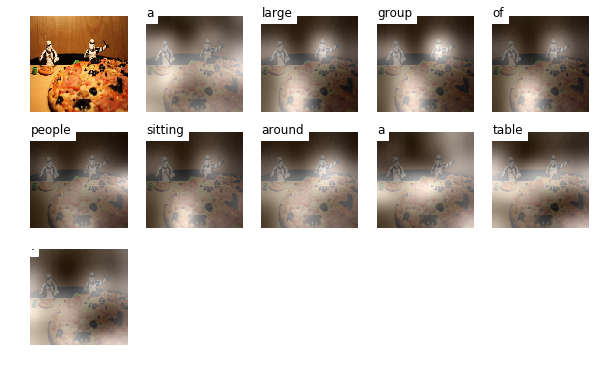

Sampled Caption: a zebra standing next to a pile of hay .


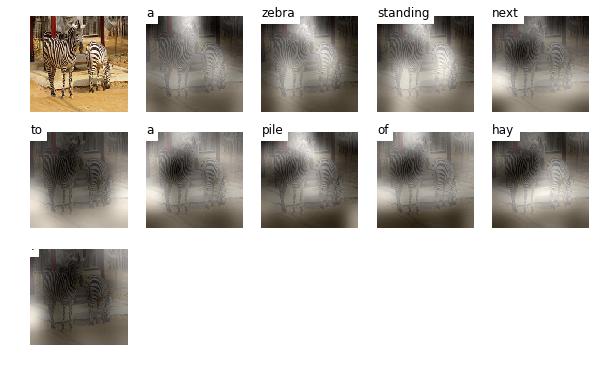

Sampled Caption: a plate of sliced oranges and apples on a table .


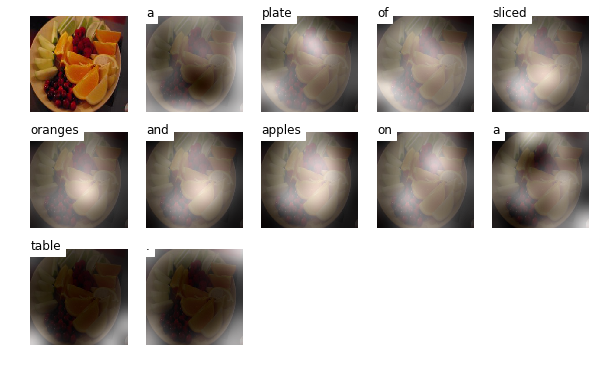

saved val.candidate.captions.pkl..


In [6]:
# sampled captions and visualize attention weights for validation dataset
solver.test(val_data, split='val')

In [7]:
# load test dataset
test_data = load_coco_data(data_path='./data', split='test')

image_idxs <type 'numpy.ndarray'> (24200,) int32
captions <type 'numpy.ndarray'> (24200, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) |S29
elapse time: 1.43


Sampled Caption: a man is preparing to serve a tennis ball .


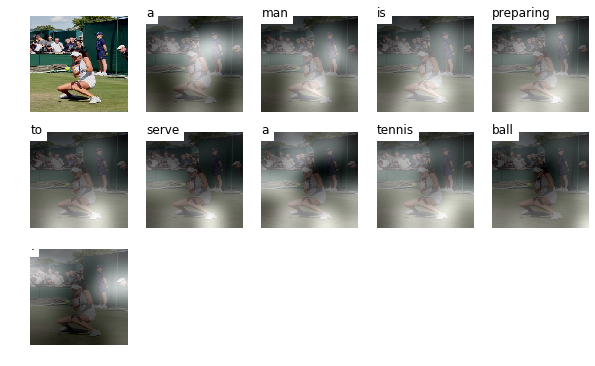

Sampled Caption: a bathroom with a toilet and trash can .


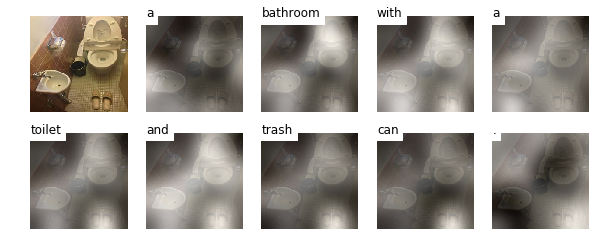

Sampled Caption: a man is riding a motorcycle with a woman .


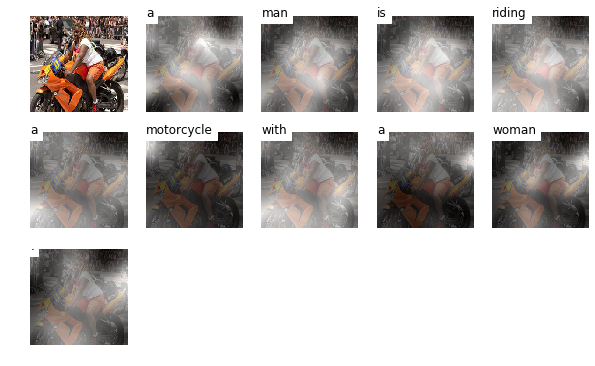

Sampled Caption: a woman is sitting at a table using a laptop .


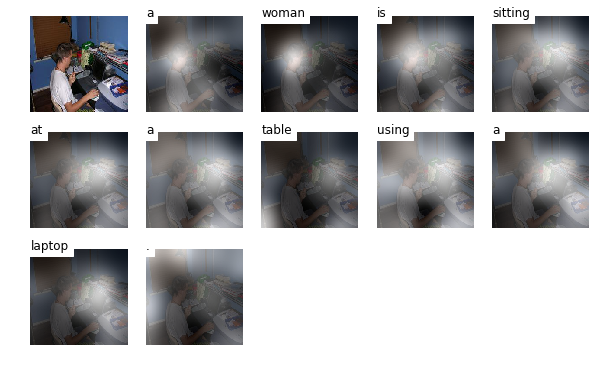

Sampled Caption: a man is sitting at a desk with a laptop .


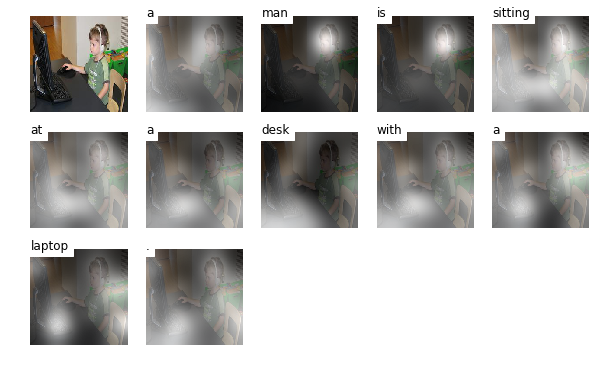

Sampled Caption: a man in a wetsuit surfing on the water .


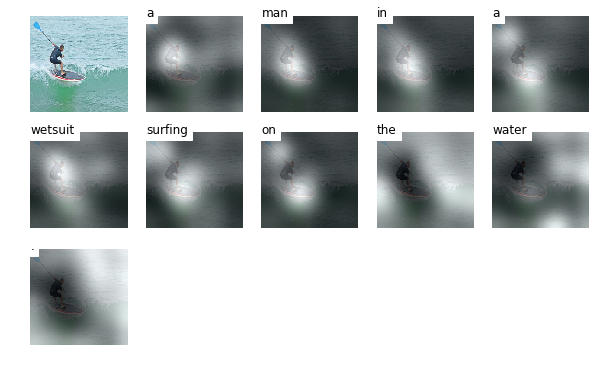

Sampled Caption: a couple of sheep standing next to a truck .


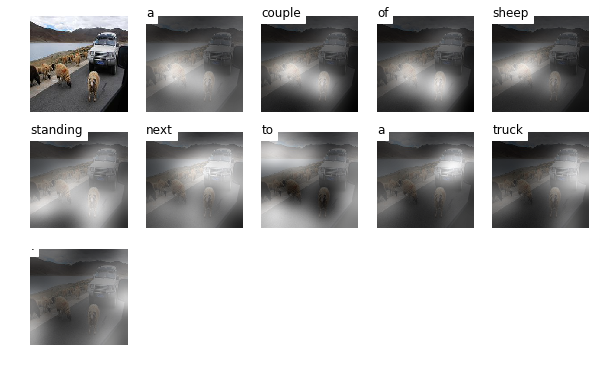

Sampled Caption: a computer keyboard and mouse on a desk in a room .


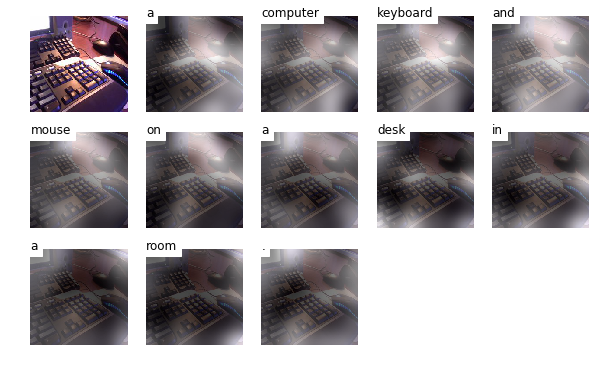

Sampled Caption: a small kitchen with a sink and a stove .


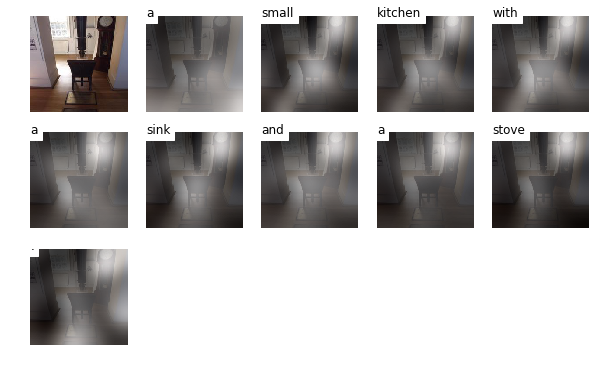

Sampled Caption: a man and woman are sitting at a table .


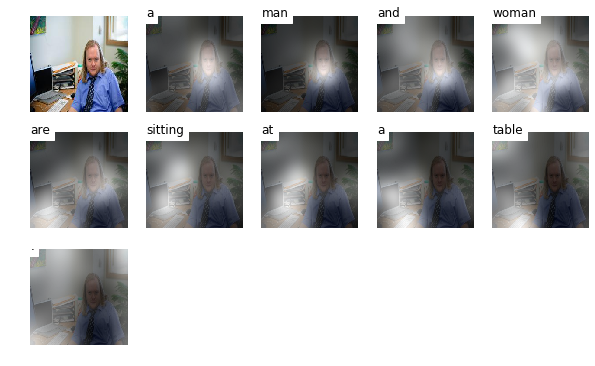

saved test.candidate.captions.pkl..


In [8]:
# sampled captions and visualize attention weights for validation dataset
solver.test(test_data, split='test')

In [83]:
# BLUE score for train dataset
#evaluate(data_path='./data', split='train')

{'reflen': 861652, 'guess': [867808, 785025, 702242, 619459], 'testlen': 867808, 'correct': [603336, 275692, 130762, 66265]}
ratio: 1.00714441561
Bleu_1:	0.695241343707
Bleu_2:	0.494126485915
Bleu_3:	0.356908595209
Bleu_4:	0.264080092835
METEOR:	0.235386984961
ROUGE_L: 0.544388542923
CIDEr:	0.807046550675


In [9]:
# BLUE score for validation dataset
evaluate(data_path='./data', split='val')

{'reflen': 52240, 'guess': [52569, 47569, 42569, 37569], 'testlen': 52569, 'correct': [34703, 14205, 5941, 2568]}
ratio: 1.00629785605
Bleu_1:	0.660141908729
Bleu_2:	0.443994162768
Bleu_3:	0.301884078237
Bleu_4:	0.208243522939
METEOR:	0.211998047963
ROUGE_L: 0.511245699684
CIDEr:	0.643313543391


In [10]:
# BLUE score for validation dataset
evaluate(data_path='./data', split='test')

{'reflen': 52007, 'guess': [52412, 47412, 42412, 37412], 'testlen': 52412, 'correct': [34351, 13915, 5866, 2612]}
ratio: 1.00778741323
Bleu_1:	0.655403342746
Bleu_2:	0.43858299961
Bleu_3:	0.298528384648
Bleu_4:	0.207601164351
METEOR:	0.210368686828
ROUGE_L: 0.508772210544
CIDEr:	0.643958964625
